In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
colors = sns.color_palette("pastel")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('Dataset/API_MS.MIL.TOTL.P1_DS2_en_csv_v2_47122.csv', skiprows = 3)

In [4]:
df_s = df[df['Country Name'] == 'Korea, Rep.'].reset_index(drop = True)
df_s

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,NaN,NaN,NaN,NaN,NaN,NaN,...,634500.0,634000.0,634000.0,608000.0,613000.0,569000.0,NaN,NaN,NaN,NaN


In [5]:
df_s_m = df_s.melt(id_vars = df_s.columns[:4], var_name = 'year', value_name = 'count')
df_s_m

,Country Name,Country Code,Indicator Name,Indicator Code,year,count
0,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,1960,NaN
1,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,1961,NaN
2,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,1962,NaN
3,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,1963,NaN
4,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,1964,NaN
...,...,...,...,...,...,...
60,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,2020,569000.0
61,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,2021,NaN
62,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,2022,NaN
63,"Korea, Rep.",KOR,"Armed forces personnel, total",MS.MIL.TOTL.P1,2023,NaN


In [6]:
df_s_m.loc[df_s_m['year'] == '2021', 'count'] = 520000
df_s_m.loc[df_s_m['year'] == '2022', 'count'] = 510000
df_s_m.loc[df_s_m['year'] == '2023', 'count'] = 480000
df_s_m = df_s_m.dropna(axis = 0).reset_index(drop = True)
df_s_m = df_s_m.astype({'year':'int32'})
df_s_m = df_s_m.loc[df_s_m['year'] >= 1998, :].reset_index(drop = True)

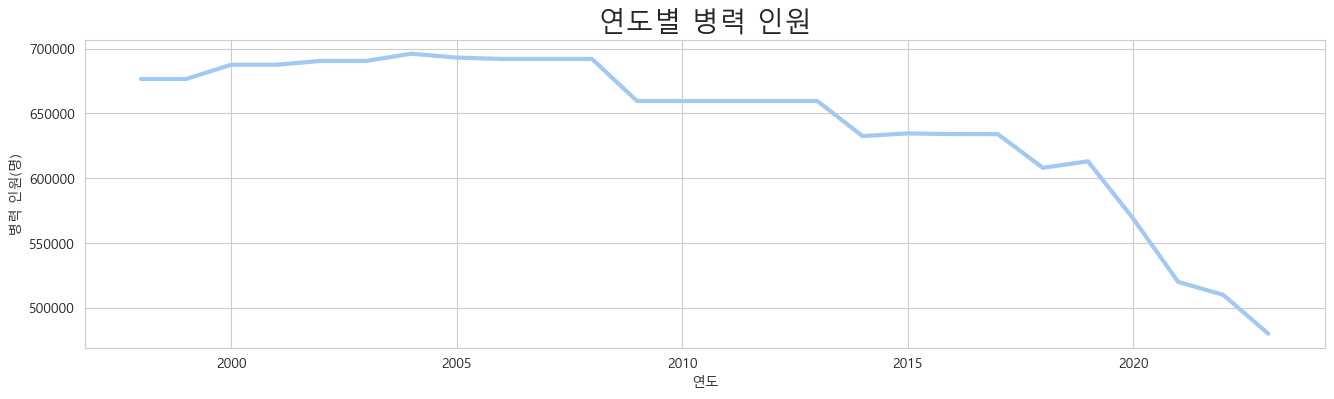

In [7]:
plt.figure(figsize = (16, 4))
sns.lineplot(x = df_s_m['year'], y = df_s_m['count'], color = colors[0], linewidth = 3)
plt.title('연도별 병력 인원', fontsize = 20)
plt.xlabel('연도')
plt.ylabel('병력 인원(명)')
plt.show()